In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
def vector_length(x):
    return np.sqrt(x@x)

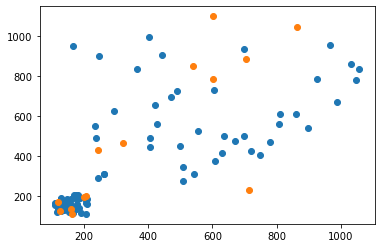

In [3]:
df = pd.read_csv('training.dat', names=['x','y'], sep=' ')
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

X = train.x.reset_index(drop = True)
y = train.y.reset_index(drop = True)
plt.scatter(X,y)

X_test = test.x.reset_index(drop = True)
y_test = test.y.reset_index(drop = True)


plt.scatter(X_test, y_test)

In [4]:
def Plot_NN(w, X, y):
    X_ = np.insert(X, 0, 1, axis=1)
    pred = [predict(w, W, x_) for x_ in X]
    plt.scatter(X, pred)
    plt.scatter(X, y)
    plt.show()

In [5]:
def NTU(x):
    return (1/(1 + np.exp(-x)))

def NTU_derivative(x):
    return NTU(x) * (1 - NTU(x))

def LTU(x):
    return x

def LTU_derivative(x):
    return 1


In [26]:
def predict(x, weight_i, weight_o):
    # Perform forward propagation
    hidden_input = x * weight_i
    hidden_output = np.array([NTU(hidden_i) for hidden_i in hidden_input])
    output_input = sum(hidden_output * weight_o[0])
    output_output = LTU(output_input)
    return output_output

def train(X, y, n_hidden = 3, learning_rate = 0.5, coeff = 0.99, epsilon = 0.001):
    
    weight_i = np.random.random(n_hidden)  # weight between input terminal and hidden unit
    weight_o = np.random.random((1,n_hidden))  # weight between hidden unit and output unit
    
    t = 0 ## epoch
    while learning_rate >= epsilon:
        
        # Put patterns in random order
        temp = list(zip(X, y))
        np.random.shuffle(temp)
        X, y = zip(*temp)
        # X and y come out as tuples, and so must be converted to lists.
        X, y = list(X), list(y)
        
        se = [] ## squared errors
        t += 1
        for p in range(len(X)):
            # Perform forward propagation
            hidden_input = X[p] * weight_i
            hidden_output = np.array([NTU(hidden_i) for hidden_i in hidden_input])
            output_input = sum(hidden_output * weight_o[0])
            output_output = LTU(output_input)
    
            ##Perform backpropagation
            output_error_derivative = (y[0] - output_output) * LTU_derivative(output_input)
            hidden_error_derivative = np.array([NTU_derivative(hidden_i) for hidden_i in hidden_input]) * (output_error_derivative * weight_o[0])  
            
            ## Update the weights
            weight_o[0] += learning_rate * hidden_output* output_error_derivative
            weight_i += learning_rate * X[0] * hidden_error_derivative 
            
            se.append(np.power(output_output - y[p],2)) 
        ## print(f'SSE at epoch {t}: {np.sum(se)}')
        learning_rate = learning_rate * coeff
        
    return (weight_i, weight_o)

X = np.arange(1,1001)
Y = 3*X
X = (X-np.min(X))/(np.max(X) - np.min(X))
# Train the neural network
w,W = train(X, y)

# Make a prediction
prediction = predict(X[10], w, W) 


C:\Users\batuk\AppData\Local\Temp/ipykernel_10640/4026214428.py:2: RuntimeWarning: overflow encountered in exp
  return (1/(1 + np.exp(-x)))


In [27]:
W

array([[-6.16297152e+17, -6.16297152e+17, -6.16297152e+17]])

In [28]:
X

array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705, 0.04804805, 0.04904905,
       0.05005005, 0.05105105, 0.05205205, 0.05305305, 0.05405405,
       0.05505506, 0.05605606, 0.05705706, 0.05805806, 0.05905906,
       0.06006006, 0.06106106, 0.06206206, 0.06306306, 0.06406406,
       0.06506507, 0.06606607, 0.06706707, 0.06806807, 0.06906907,
       0.07007007, 0.07107107, 0.07207207, 0.07307307, 0.07407

In [29]:
def sse(w, W, X, y):
    se = []
    for p, x in enumerate(X):    
        pred = predict(X[p], w, W)                
        se.append(np.power(y[p] - pred,2))
    sse = sum(se)
    return sse

def mse(w, W, X, y):
    se = []
    for p, x in enumerate(X):    
        pred = predict(X[p], w, W)                
        se.append(np.power(y[p] - pred,2))
    sse = sum(se)
    mse = sse/len(X)
    return mse

def var(w, W, X, y, mse):
    sdiff = []
    for p, x in enumerate(X):    
        pred = predict(X[p], w, W)                
        sdiff.append(mse - np.power(y[p] - pred,2))
    ssdiff = sum(sdiff)
    var = ssdiff/(len(X)-1)
    return var

def find_hidden_count(w, W, min=1, max=20):
    mse_scores = []
    for n in np.arange(min,max):
        w,W = train(X, y, n_hidden = n)
        mse_scores.append(mse(w, W, X, y))
    return(np.argmin() + 1)
        
w, W = train(X, y, n_hidden = find_hidden_count(w, W))


training_SSE= sse(w, W, X, y)
test_MSE = mse(w, W, X_test, y_test)
test_var = var(w, W, X_test, y_test, test_MSE)

results_2a = pd.DataFrame({'Method':'2.a','Training SSE': training_SSE,'Test MSE': test_MSE, 'Test Var': test_var})

C:\Users\batuk\AppData\Local\Temp/ipykernel_10640/4026214428.py:2: RuntimeWarning: overflow encountered in exp
  return (1/(1 + np.exp(-x)))


KeyError: 86

In [ ]:
results_2a

In [ ]:
prediction

In [ ]:
X[10]